Epoch 1/4
782/782 [==============================] - 95s 120ms/step - loss: 1.4905 - accuracy: 0.4656 - val_loss: 1.2192 - val_accuracy: 0.5748
Epoch 2/4
782/782 [==============================] - 90s 116ms/step - loss: 1.1099 - accuracy: 0.6115 - val_loss: 1.0450 - val_accuracy: 0.6319
Epoch 3/4
782/782 [==============================] - 88s 113ms/step - loss: 0.9752 - accuracy: 0.6629 - val_loss: 0.9645 - val_accuracy: 0.6590
Epoch 4/4
313/313 [==============================] - 6s 20ms/step - loss: 0.9457 - accuracy: 0.6691
Test Loss: 0.9456815719604492
Test Accuracy: 0.6690999865531921


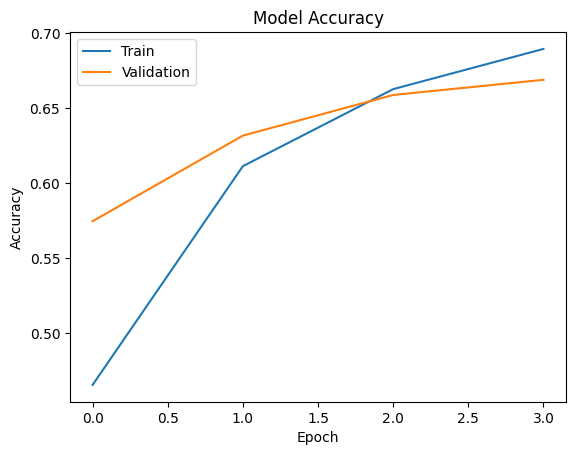

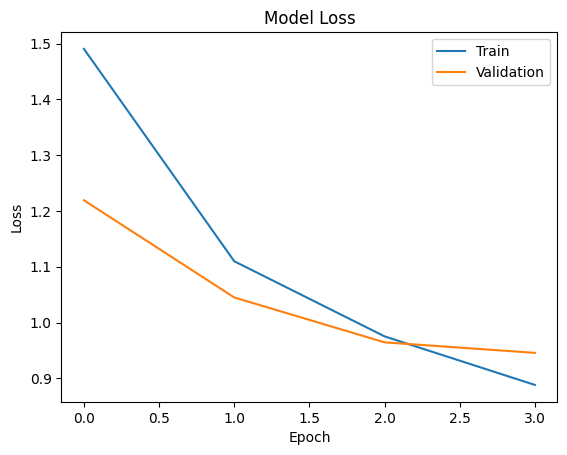

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Define the ConvNet model architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=4, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
